In [31]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

In [32]:
df = pd.read_csv("bank.csv",sep=";")

In [33]:
df.head()
df.drop("duration",axis=1)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no


In [34]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [36]:
column_names = df.columns
column_names

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [37]:
df['y'].value_counts()

no     3668
yes     451
Name: y, dtype: int64

In [38]:
numericCols = df.select_dtypes(include=["int64","float64"]).columns
numericCols

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [39]:
catCols = [var for var in df.columns if df[var].dtype == 'O']
catCols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

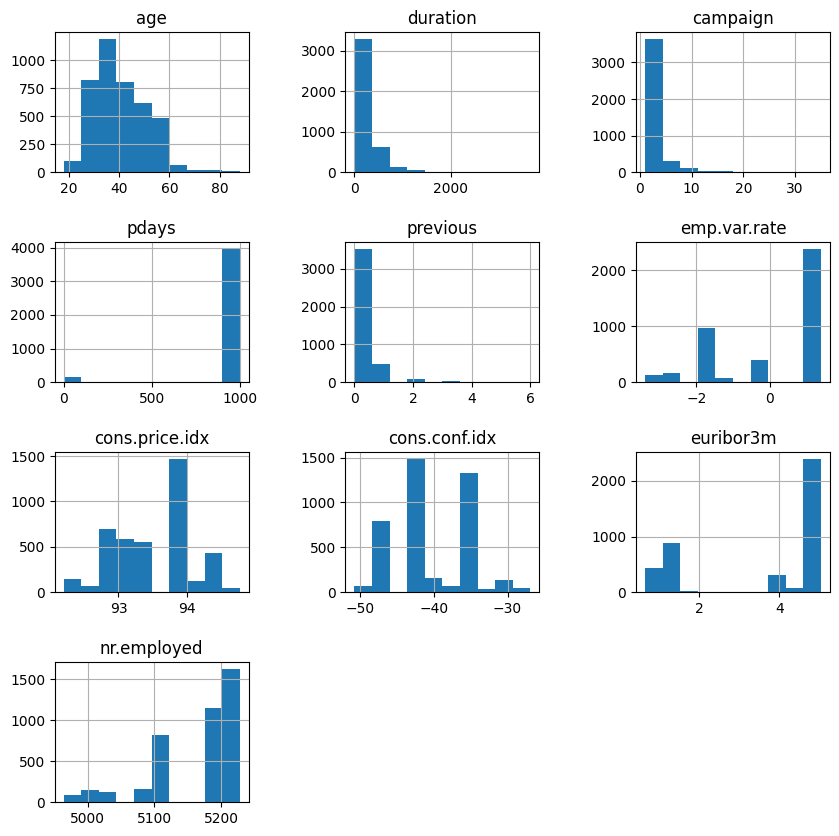

In [40]:
df.hist(column=numericCols,figsize=(10,10))
plt.subplots_adjust(wspace = 0.5, hspace = 0.5)
plt.show()

bu veri setinde kategorik değişkenler ordinal ve nominal şekilde verilmiş.
ordinal olanlarda sıra önemlidir (çok iyi,iyi,normal,kötü gibi), nominal değişkenlerde önemsizdir.(sarı,kırmızı,beyaz gibi)

in this data set, categorical variables are given as ordinal and nominal.
ordinal ones, the order is important (such as very good, good, normal, bad), nominal variables are not important (such as yellow, red, white)

In [41]:
df['poutcome'].value_counts()

nonexistent    3523
failure         454
success         142
Name: poutcome, dtype: int64

In [42]:
df['poutcome'] = df['poutcome'].map({'failure': -1,'nonexistent': 0,'success': 1})
df['poutcome'].value_counts()

 0    3523
-1     454
 1     142
Name: poutcome, dtype: int64

In [43]:
df['default'].value_counts()

no         3315
unknown     803
yes           1
Name: default, dtype: int64

In [44]:
df['default'] = df['default'].map({'yes': -1,'unknown': 0,'no': 1})
df['default'].value_counts()

 1    3315
 0     803
-1       1
Name: default, dtype: int64

In [45]:
df['housing'] = df['housing'].map({'yes': -1,'unknown': 0,'no': 1})
df['loan'] = df['loan'].map({'yes': -1,'unknown': 0,'no': 1})

In [46]:
nominal = ['job','marital','education','contact','month','day_of_week']

In [47]:
df = pd.get_dummies(df,columns=nominal)
df.columns

Index(['age', 'default', 'housing', 'loan', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'day_of

In [48]:
df['y']=df['y'].map({'yes': 1,'no': 0})
df.head()

,age,default,housing,loan,duration,campaign,pdays,previous,poutcome,emp.var.rate,...,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,30,1,-1,1,487,2,999,0,0,-1.8,...,0,1,0,0,0,1,0,0,0,0
1,39,1,1,1,346,4,999,0,0,1.1,...,0,1,0,0,0,1,0,0,0,0
2,25,1,-1,1,227,1,999,0,0,1.4,...,0,0,0,0,0,0,0,0,0,1
3,38,1,0,0,17,3,999,0,0,1.4,...,0,0,0,0,0,1,0,0,0,0
4,47,1,-1,1,58,1,999,0,0,-0.1,...,0,0,1,0,0,0,1,0,0,0


In [49]:
X = df.drop(['y'], axis=1)


y = df['y']

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 50)

Feature Scaling

In [51]:
cols = X_train.columns
X_train[numericCols]

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
1888,28,203,1,999,0,1.4,93.918,-42.7,4.956,5228.1
1426,50,137,1,999,0,1.4,93.444,-36.1,4.966,5228.1
2352,31,363,2,999,0,1.1,93.994,-36.4,4.857,5191.0
3561,46,61,1,999,1,-0.1,93.200,-42.0,4.191,5195.8
3614,39,322,3,999,0,1.1,93.994,-36.4,4.856,5191.0
...,...,...,...,...,...,...,...,...,...,...
3330,39,43,9,999,0,1.1,93.994,-36.4,4.860,5191.0
70,39,432,4,999,0,1.4,94.465,-41.8,4.865,5228.1
132,38,360,1,999,0,-1.8,93.075,-47.1,1.392,5099.1
2014,36,238,1,999,0,-1.1,94.767,-50.8,1.046,4963.6


In [52]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

In [53]:
X_train[cols]

,age,default,housing,loan,duration,campaign,pdays,previous,poutcome,emp.var.rate,...,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,-1.197581,0.497348,-0.946954,0.474182,-0.220461,-0.593489,0.195537,-0.34657,0.199670,0.837750,...,-0.101098,-0.714417,-0.356044,-0.121591,-0.119866,-0.470588,-0.503665,-0.523174,-0.511861,2.039280
1,0.948763,-2.000511,1.084229,0.474182,-0.489787,-0.593489,0.195537,-0.34657,0.199670,0.837750,...,-0.101098,-0.714417,-0.356044,-0.121591,-0.119866,-0.470588,-0.503665,-0.523174,1.953654,-0.490369
2,-0.904898,-2.000511,1.084229,0.474182,0.432449,-0.209183,0.195537,-0.34657,0.199670,0.645584,...,-0.101098,1.399743,-0.356044,-0.121591,-0.119866,-0.470588,1.985447,-0.523174,-0.511861,-0.490369
3,0.558518,0.497348,-0.946954,0.474182,-0.799920,-0.593489,0.195537,1.58220,-2.541352,-0.123082,...,-0.101098,-0.714417,2.808645,-0.121591,-0.119866,-0.470588,1.985447,-0.523174,-0.511861,-0.490369
4,-0.124409,0.497348,-0.946954,0.474182,0.265141,0.175123,0.195537,-0.34657,0.199670,0.645584,...,-0.101098,1.399743,-0.356044,-0.121591,-0.119866,-0.470588,-0.503665,-0.523174,1.953654,-0.490369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2466,-0.124409,0.497348,-0.946954,0.474182,-0.873372,2.480956,0.195537,-0.34657,0.199670,0.645584,...,-0.101098,1.399743,-0.356044,-0.121591,-0.119866,-0.470588,-0.503665,1.911409,-0.511861,-0.490369
2467,-0.124409,-2.000511,1.084229,0.474182,0.714017,0.559428,0.195537,-0.34657,0.199670,0.837750,...,-0.101098,-0.714417,-0.356044,-0.121591,-0.119866,-0.470588,1.985447,-0.523174,-0.511861,-0.490369
2468,-0.221970,0.497348,1.084229,0.474182,0.420207,-0.593489,0.195537,-0.34657,0.199670,-1.212025,...,-0.101098,-0.714417,-0.356044,-0.121591,-0.119866,-0.470588,1.985447,-0.523174,-0.511861,-0.490369
2469,-0.417092,0.497348,1.084229,0.474182,-0.077637,-0.593489,0.195537,-0.34657,0.199670,-0.763637,...,-0.101098,-0.714417,2.808645,-0.121591,-0.119866,-0.470588,-0.503665,-0.523174,1.953654,-0.490369


Navie Bayes

Naive bayes için en iyi hiperparametreyi bulmak için grid search kullanacağız.
We will use grid search to find the best hyperparameter for naive bayes.

In [54]:
from sklearn.model_selection import GridSearchCV
params_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6],
               'priors': [None, [0.5, 0.5], [0.7, 0.3], [0.3, 0.7]]}


In [55]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

gnb.fit(X_train,y_train)

y_pred = gnb.predict(X_test)

y_pred

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [56]:
from sklearn.metrics import roc_auc_score
print('ROC-AUC score: {0:0.2f}'.format(roc_auc_score(y_test, y_pred)))



ROC-AUC score: 0.71


In [57]:
grid_search = GridSearchCV(gnb, params_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'priors': [None, [0.5, 0.5], [0.7, 0.3], [0.3, 0.7]],
                         'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06]},
             scoring='accuracy')

In [58]:
print("hyperparameter: ", grid_search.best_params_)
print("accuracy : ", grid_search.best_score_)

hyperparameter:  {'priors': None, 'var_smoothing': 1e-06}
accuracy :  0.8466584877111194


Recall is used as a useful metric, especially for disease detection, spam filtering, and detecting fraudulent transactions.

In [59]:
from sklearn.metrics import recall_score

recall = recall_score(y_test, y_pred)
print('Recall Score: %{:.2f}'.format(recall * 100))

Recall Score: %52.55


In [60]:
from sklearn.metrics import roc_auc_score
y_pred_score = roc_auc_score(y_test, y_pred)
print('y_pred_score: {0:0.4f}'. format(y_pred_score))

y_pred_score: 0.7104


it would be better to use logistic regression in this project because the standard accuracy rate is low for me.